# K-Means aplicado ao ENADE

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setando DF's pro K-Means

In [76]:
dadosNormalizados = pd.read_csv('/content/enade_normalizado.csv')
dadosNaoNormalizados = pd.read_csv('/content/enade_nao_normalizado.csv')

In [77]:
dadosNormalizados.head()

,ano,curso,regiao,organizacao_academica,turno_graduacao,tipo_presenca,ANO_FIM_EM,ANO_IN_GRAD,grupo_ADS,grupo_BSI,...,atividade_af_Outro,atividade_af_PET,escola_ensino_medio_Exterior,escola_ensino_medio_Privada,escola_ensino_medio_Pública,escola_fundamental_Não,escola_fundamental_Sim,nota_geral,idade,sexo
0,2014,317,2,10028,2,555,2008,2009,0,0,...,0,0,0,0,1,0,1,1.094498,-0.542653,0
1,2014,317,2,10028,2,555,2002,2008,0,0,...,0,0,0,0,1,0,1,2.882863,-0.706501,0
2,2014,317,2,10028,2,555,2009,2010,0,0,...,0,0,0,0,1,0,1,-0.628704,-0.542653,0
3,2014,317,2,10028,2,555,2010,2011,0,0,...,0,0,0,0,1,0,1,0.819365,-0.870348,0
4,2014,317,2,10028,2,555,2007,2009,0,0,...,0,0,0,0,1,0,1,1.210343,0.112736,0


In [78]:
dadosNormalizados.columns

Index(['ano', 'curso', 'regiao', 'organizacao_academica', 'turno_graduacao',
       'tipo_presenca', 'ANO_FIM_EM', 'ANO_IN_GRAD', 'grupo_ADS', 'grupo_BSI',
       'grupo_CC', 'grupo_EC', 'grupo_LBCC', 'grupo_RC', 'uf_AL', 'uf_BA',
       'uf_CE', 'uf_MA', 'uf_PB', 'uf_PE', 'uf_PI', 'uf_RN', 'uf_SE',
       'categoria_administrativa_Privada', 'categoria_administrativa_Pública',
       'estado_civil_Casado', 'estado_civil_Outro', 'estado_civil_Separado',
       'estado_civil_Solteiro', 'estado_civil_Viúvo', 'raca_cor_Amarela',
       'raca_cor_Branca', 'raca_cor_Indígena', 'raca_cor_Não declarado',
       'raca_cor_Parda', 'raca_cor_Preta', 'nacionalidade_Brasileira',
       'nacionalidade_Brasileira naturalizada', 'nacionalidade_Estrangeira',
       'escolaridade_pai_Ensino Médio', 'escolaridade_pai_Fundamental I',
       'escolaridade_pai_Fundamental II', 'escolaridade_pai_Nenhuma',
       'escolaridade_pai_Pós-graduação', 'escolaridade_pai_Superior',
       'escolaridade_mae_Ensino Mé

In [79]:
dadosNaoNormalizados.head()

,ano,curso,regiao,organizacao_academica,turno_graduacao,tipo_presenca,idade,ANO_FIM_EM,ANO_IN_GRAD,grupo_ADS,...,atividade_af_Monitoria/Tutoria,atividade_af_Não,atividade_af_Outro,atividade_af_PET,escola_ensino_medio_Exterior,escola_ensino_medio_Privada,escola_ensino_medio_Pública,escola_fundamental_Não,escola_fundamental_Sim,nota_geral
0,2014,317,2,10028,2,555,24,2008,2009,0,...,0,1,0,0,0,0,1,0,1,56.4
1,2014,317,2,10028,2,555,23,2002,2008,0,...,0,1,0,0,0,0,1,0,1,81.1
2,2014,317,2,10028,2,555,24,2009,2010,0,...,0,1,0,0,0,0,1,0,1,32.6
3,2014,317,2,10028,2,555,22,2010,2011,0,...,0,1,0,0,0,0,1,0,1,52.6
4,2014,317,2,10028,2,555,28,2007,2009,0,...,0,1,0,0,0,0,1,0,1,58.0


In [80]:
dadosNaoNormalizados.columns

Index(['ano', 'curso', 'regiao', 'organizacao_academica', 'turno_graduacao',
       'tipo_presenca', 'idade', 'ANO_FIM_EM', 'ANO_IN_GRAD', 'grupo_ADS',
       'grupo_BSI', 'grupo_CC', 'grupo_EC', 'grupo_LBCC', 'grupo_RC', 'uf_AL',
       'uf_BA', 'uf_CE', 'uf_MA', 'uf_PB', 'uf_PE', 'uf_PI', 'uf_RN', 'uf_SE',
       'categoria_administrativa_Privada', 'categoria_administrativa_Pública',
       'sexo_F', 'sexo_M', 'estado_civil_Casado', 'estado_civil_Outro',
       'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_Viúvo',
       'raca_cor_Amarela', 'raca_cor_Branca', 'raca_cor_Indígena',
       'raca_cor_Não declarado', 'raca_cor_Parda', 'raca_cor_Preta',
       'nacionalidade_Brasileira', 'nacionalidade_Brasileira naturalizada',
       'nacionalidade_Estrangeira', 'escolaridade_pai_Ensino Médio',
       'escolaridade_pai_Fundamental I', 'escolaridade_pai_Fundamental II',
       'escolaridade_pai_Nenhuma', 'escolaridade_pai_Pós-graduação',
       'escolaridade_pai_Superior'

## Features para o K-Means e aplicação

In [148]:
dados = dadosNormalizados

dadosKmeans = dados[['turno_graduacao', 'grupo_ADS', 'grupo_BSI',
       'grupo_CC', 'grupo_EC', 'grupo_LBCC', 'grupo_RC', 'uf_AL', 'uf_BA',
       'uf_CE', 'uf_MA', 'uf_PB', 'uf_PE', 'uf_PI', 'uf_RN', 'uf_SE',
       'categoria_administrativa_Privada', 'categoria_administrativa_Pública',
       'estado_civil_Casado', 'estado_civil_Outro', 'estado_civil_Separado',
       'estado_civil_Solteiro', 'estado_civil_Viúvo', 'raca_cor_Amarela',
       'raca_cor_Branca', 'raca_cor_Indígena', 'raca_cor_Não declarado',
       'raca_cor_Parda', 'raca_cor_Preta', 'nacionalidade_Brasileira',
       'nacionalidade_Brasileira naturalizada', 'nacionalidade_Estrangeira',
       'escolaridade_pai_Ensino Médio', 'escolaridade_pai_Fundamental I',
       'escolaridade_pai_Fundamental II', 'escolaridade_pai_Nenhuma',
       'escolaridade_pai_Pós-graduação', 'escolaridade_pai_Superior',
       'escolaridade_mae_Ensino Médio', 'escolaridade_mae_Fundamental I',
       'escolaridade_mae_Fundamental II', 'escolaridade_mae_Nenhuma',
       'escolaridade_mae_Pós-graduação', 'escolaridade_mae_Superior',
       'renda_familiar_1.5 SM', 'renda_familiar_1.5 a 3 SM',
       'renda_familiar_10 a 30 SM', 'renda_familiar_3 a 4.5 SM',
       'renda_familiar_4.5 a 6 SM', 'renda_familiar_6 a 10 SM',
       'renda_familiar_Acima de 30 SM', 'situacao_financeira_Possui renda',
       'situacao_financeira_Possui renda/Outros',
       'situacao_financeira_Possui renda/Sustento',
       'situacao_financeira_Possui renda/principal',
       'situacao_financeira_Sem renda/Outros',
       'situacao_trabalho_Não trabalha',
       'situacao_trabalho_Trabalha eventualmente',
       'situacao_trabalho_Trabalho 21h/39h semanais',
       'situacao_trabalho_Trabalho 40h +',
       'situacao_trabalho_Trabalho até 20h semanais', 'tipo_bolsa_Não',
       'tipo_bolsa_Não se aplica', 'tipo_bolsa_Sim',
       'tipo_auxilio_Alimentação', 'tipo_auxilio_Moradia',
       'tipo_auxilio_Moradia e Alimentação', 'tipo_auxilio_Nenhum',
       'tipo_auxilio_Outro', 'tipo_auxilio_Permanência',
       'bolsa_academica_Extensão', 'bolsa_academica_IC',
       'bolsa_academica_Monitoria/Tutoria', 'bolsa_academica_Nenhum',
       'bolsa_academica_Outro', 'bolsa_academica_PET', 'atividade_af_Extensão',
       'atividade_af_IC', 'atividade_af_Monitoria/Tutoria', 'atividade_af_Não',
       'atividade_af_Outro', 'atividade_af_PET',
       'escola_ensino_medio_Exterior', 'escola_ensino_medio_Privada',
       'escola_ensino_medio_Pública', 'escola_fundamental_Não',
       'escola_fundamental_Sim', 'sexo']] #não passei nota geral!
X = dadosKmeans.values

In [149]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(X)

dados['cluster'] = kmeans.labels_.tolist()

## Ordenação dos Agrupamentos pela **NOTA GERAL**.

In [158]:
colunas_para_recuperar = ['nota_geral', 'idade']

for col in colunas_para_recuperar:
    dados[col + '_orig'] = dadosNaoNormalizados[col]
media_nota_por_cluster = dados.groupby('cluster')['nota_geral_orig'].mean()
print(media_nota_por_cluster)

cluster
0    42.626211
1    44.266838
2    38.540035
Name: nota_geral_orig, dtype: float64


Com essa visualização da média de nota geral por cluster, cabe fazer uma ordenação destes agrupamentos para manter a confiabilidade e interpretabilidade dos clusters.

O cluster com a maior nota média será o de **Alto Rendimento**, o mediano será **Médio Rendimento** e o último será o de **Baixo Rendimento**.

In [159]:
medias_por_cluster = dados.groupby('cluster')['nota_geral'].mean().sort_values(ascending=False)
nova_ordem = {antigo: novo for novo, antigo in enumerate(medias_por_cluster.index)}

dados['cluster_ordenado'] = dados['cluster'].map(nova_ordem)
labelsClusters = ['Alto\nrendimento', 'Médio\nrendimento', 'Baixo\nrendimento']
labelsClustersSemEspaco = ['Alto rendimento', 'Médio rendimento', 'Baixo rendimento']
dados['cluster_legenda'] = dados['cluster_ordenado'].map({i: label for i, label in enumerate(labelsClustersSemEspaco)})

Testando pra ver se a sequência de ordenação que eu setei está correta. 2014 teve mais pessoas no cluster de baixo desempenho, e isto está sendo mostrado no plot. Assim como em todos os outros anos.

In [160]:
media_nota_por_cluster = dados.groupby('cluster_ordenado')['nota_geral_orig'].mean().round(2)
print(media_nota_por_cluster)

cluster_ordenado
0    44.27
1    42.63
2    38.54
Name: nota_geral_orig, dtype: float64


## Visualizações

0. Alto rendimento - azul
1. Médio rendimento - amarelo
2. Baixo rendimento - vermelho

### 1. Distribuição de Alunos por Cluster ao Longo dos Anos

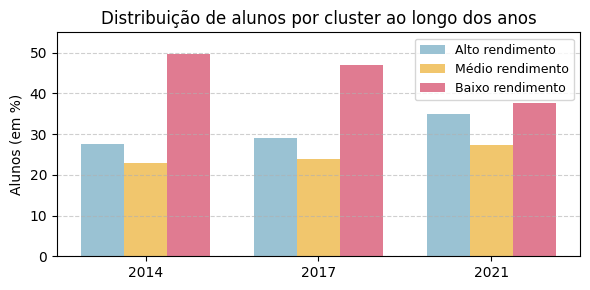

In [ ]:
totais_por_ano = dados['ano'].value_counts().sort_index()
contagem = dados.groupby(['ano', 'cluster_ordenado']).size().unstack(fill_value=0)
proporcao = contagem.div(totais_por_ano, axis=0) * 100
anos = proporcao.index.astype(str).tolist()
x = np.arange(len(anos))
width = 0.25
cores = ['#9ac2d3', '#f1c66d', '#e07b91']

fig, ax = plt.subplots(figsize=(6, 3))
for i in range(3):
    ax.bar(x + i * width, proporcao[i], width, label=labelsClustersSemEspaco[i], color=cores[i])

plt.xticks(x + width, anos)
plt.ylabel('Alunos (em %)')
plt.ylim(0, 55)
plt.title('Distribuição de alunos por cluster ao longo dos anos')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=9)  # ← legenda no canto
plt.tight_layout()
plt.show()

In [ ]:
media_por_cluster_ano = dados.groupby(['cluster_ordenado', 'ano'])['nota_geral_orig'].mean().reset_index(name='media')
print(media_por_cluster_ano)
print('----')
print(contagem)

   cluster_ordenado   ano      media
0                 0  2014  49.325068
1                 0  2017  45.722606
2                 0  2021  38.326308
3                 1  2014  46.062990
4                 1  2017  44.850368
5                 1  2021  37.277972
6                 2  2014  41.199365
7                 2  2017  39.581944
8                 2  2021  33.110907
----
cluster_ordenado     0     1     2
ano                               
2014              1831  1532  3305
2017              1650  1358  2664
2021              1969  1548  2127


### 2. Distribuição de alunos por Cluster

In [ ]:
#1831 + 1650 + 1969 = 5450
#1532 + 1358 + 1548 = 4437
#3305 + 2664 + 2127 = 8097

In [184]:
quantidade_alunos_cluster_ano = dados.groupby(['cluster', 'ano']).size().reset_index(name='quantidade_alunos')

print(quantidade_alunos_cluster_ano)

   cluster   ano  quantidade_alunos
0        0  2014               1531
1        0  2017               1358
2        0  2021               1548
3        1  2014               1831
4        1  2017               1650
5        1  2021               1968
6        2  2014               3306
7        2  2017               2664
8        2  2021               2128


In [ ]:
quantidade_por_cluster = dados.groupby('cluster').size()
print(quantidade_por_cluster)

cluster
0    5450
1    8097
2    4437
dtype: int64


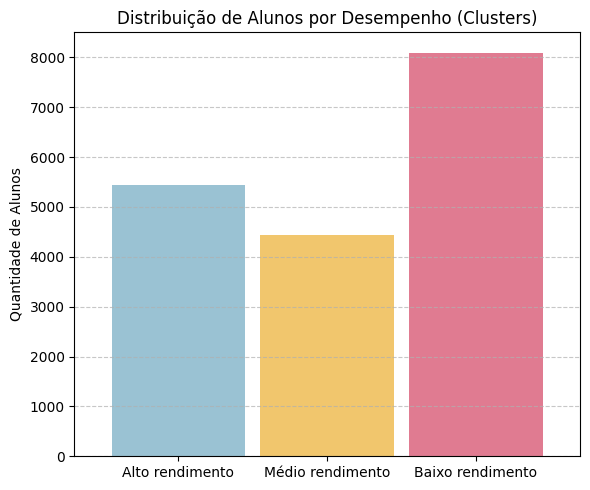

In [ ]:
quantidade_ordenada = pd.Series(
    [5450, 4437, 8097],  # Alto, Médio, Baixo
    index=['Alto rendimento', 'Médio rendimento', 'Baixo rendimento']
)

cores_ordenadas = ['#9ac2d3', '#f1c66d', '#e07b91']

plt.figure(figsize=(6, 5))
quantidade_ordenada.plot(
    kind='bar',
    color=cores_ordenadas,
    width=0.9
)
plt.title('Distribuição de Alunos por Desempenho (Clusters)')
plt.ylabel('Quantidade de Alunos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3. Distribuição de alunos por nota geral (normalizada)

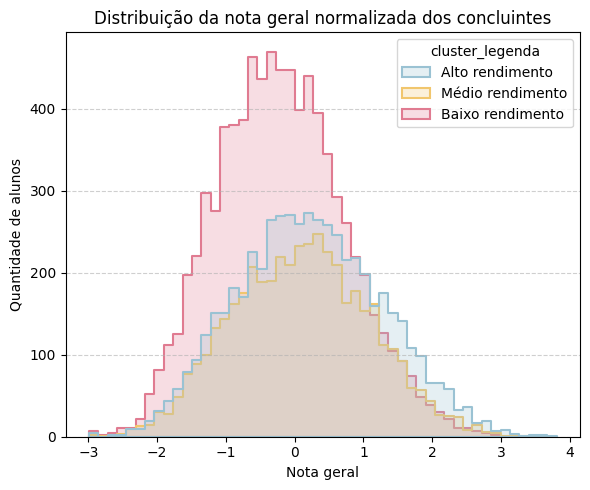

In [ ]:
plt.figure(figsize=(6, 5))
sns.histplot(
    data=dados,
    x='nota_geral',
    hue='cluster_legenda',
    hue_order=labelsClustersSemEspaco,
    bins=50,
    element='step',
    common_norm=False,
    stat='count',
    palette=['#9ac2d3', '#f1c66d', '#e07b91'],
    alpha=0.25,
    fill=True,
    linewidth=1.5
)

plt.title('Distribuição da nota geral normalizada dos concluintes')
plt.xlabel('Nota geral')
plt.ylabel('Quantidade de alunos')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Visualizações socioeconômicas

Entrar com questão da escolaridade, renda familiar, bolsa auxilio e bolsa acadêmica.

### 1. Área de Enquadramento por Rendimento

In [172]:
cols_cursos = ['grupo_ADS', 'grupo_BSI', 'grupo_CC', 'grupo_EC', 'grupo_LBCC']
distribuicao_cursos_cluster = dados.groupby('cluster')[cols_cursos].mean()
print(distribuicao_cursos_cluster)

         grupo_ADS  grupo_BSI  grupo_CC  grupo_EC  grupo_LBCC
cluster                                                      
0         0.132071   0.226730  0.449854  0.044174    0.074149
1         0.085520   0.286658  0.336208  0.033768    0.230868
2         0.216597   0.415535  0.169054  0.007780    0.008644


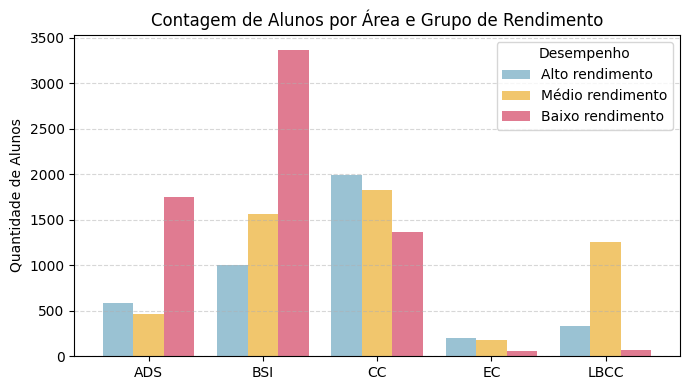

In [183]:
contagem_cursos_cluster = dados.groupby('cluster')[cols_cursos].sum()
contagem_cursos_cluster.columns = ['ADS', 'BSI', 'CC', 'EC', 'LBCC']

df_plot = contagem_cursos_cluster.T
labelsClusters = ['Alto rendimento', 'Médio rendimento', 'Baixo rendimento']
mapa_cluster = {i: labelsClusters[i] for i in range(len(labelsClusters))}
df_plot.columns = df_plot.columns.map(mapa_cluster)

df_plot.plot(kind='bar', figsize=(7, 4), width=0.8,
             color=['#9ac2d3', '#f1c66d', '#e07b91'])

plt.title('Contagem de Alunos por Área e Grupo de Rendimento')
plt.ylabel('Quantidade de Alunos')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(title='Desempenho')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 2. UF por Rendimento

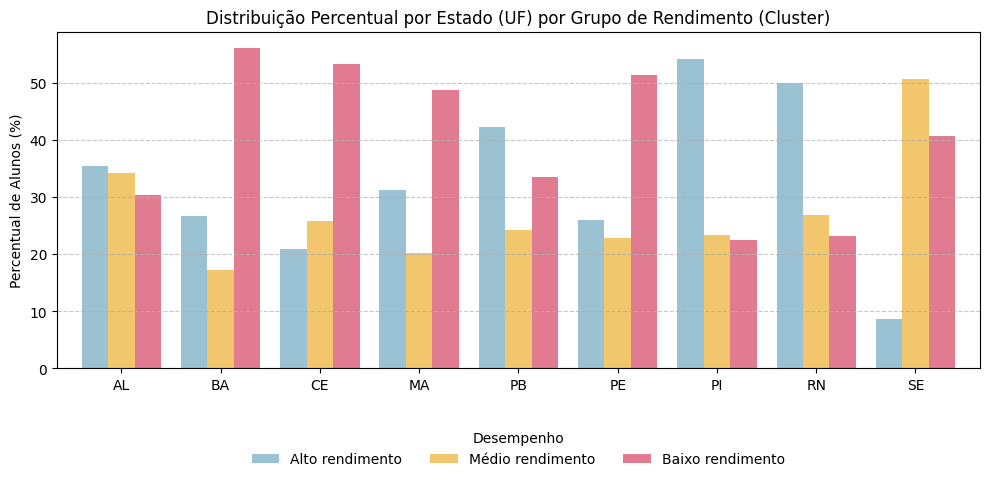

In [202]:
cores = {
    'Alto rendimento': '#9ac2d3',
    'Médio rendimento': '#f1c66d',
    'Baixo rendimento': '#e07b91'
}

cols_uf = [col for col in dados.columns if col.startswith('uf_')]
uf_cluster = dados.groupby('cluster_legenda')[cols_uf].sum().T
uf_cluster.index = [col.replace('uf_', '') for col in uf_cluster.index]
uf_cluster_percent = uf_cluster.div(uf_cluster.sum(axis=1), axis=0) * 100

ordem_clusters = ['Alto rendimento', 'Médio rendimento', 'Baixo rendimento']
uf_cluster_percent = uf_cluster_percent[ordem_clusters]

fig, ax = plt.subplots(figsize=(10, 5))

cores_usadas = [cores[cluster] for cluster in uf_cluster_percent.columns]

uf_cluster_percent.plot(kind='bar', ax=ax, color=cores_usadas, width=0.8)

ax.set_title('Distribuição Percentual por Estado (UF) por Grupo de Rendimento (Cluster)')
ax.set_ylabel('Percentual de Alunos (%)')
ax.set_xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(range(len(uf_cluster_percent.index)))
ax.set_xticklabels(uf_cluster_percent.index, rotation=0)

ax.legend(title='Desempenho', loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=3, frameon=False)

plt.tight_layout()
plt.show()


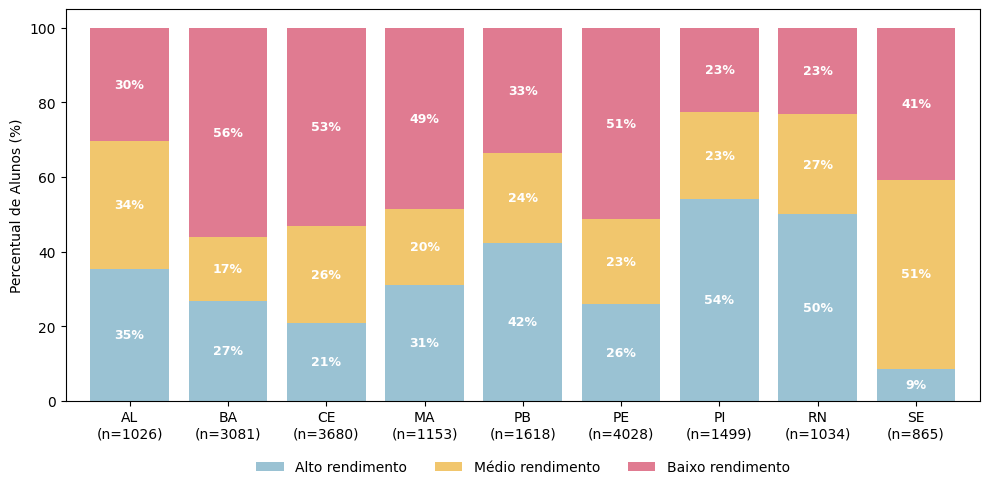

In [234]:
fig, ax = plt.subplots(figsize=(10, 5))

bars = uf_cluster_percent[ordem_clusters].plot(
    kind='bar',
    stacked=True,
    color=[cores[label] for label in ordem_clusters],
    ax=ax,
    width=0.8
)

ax.set_title('')
ax.set_ylabel('Percentual de Alunos (%)')
ax.set_xlabel('')
ax.set_xticklabels(uf_cluster_percent.index, rotation=0)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          ncol=3, frameon=False)
total_por_estado = uf_cluster.sum(axis=1)

ax.set_xticklabels([
    f"{uf}\n(n={int(total_por_estado[uf])})" for uf in uf_cluster_percent.index
], rotation=0)

for i, estado in enumerate(uf_cluster_percent.index):
    altura_acumulada = 0
    for cluster in ordem_clusters:
        valor = uf_cluster_percent.loc[estado, cluster]
        if valor > 5:  # evitar valores muito pequenos
            ax.text(
                i,
                altura_acumulada + valor / 2,
                f'{valor:.0f}%',
                ha='center', va='center', color='white', fontsize=9, fontweight='bold'
            )
        altura_acumulada += valor

plt.tight_layout()
plt.show()


### 3. Rendimento por Renda Familiar do Concluinte

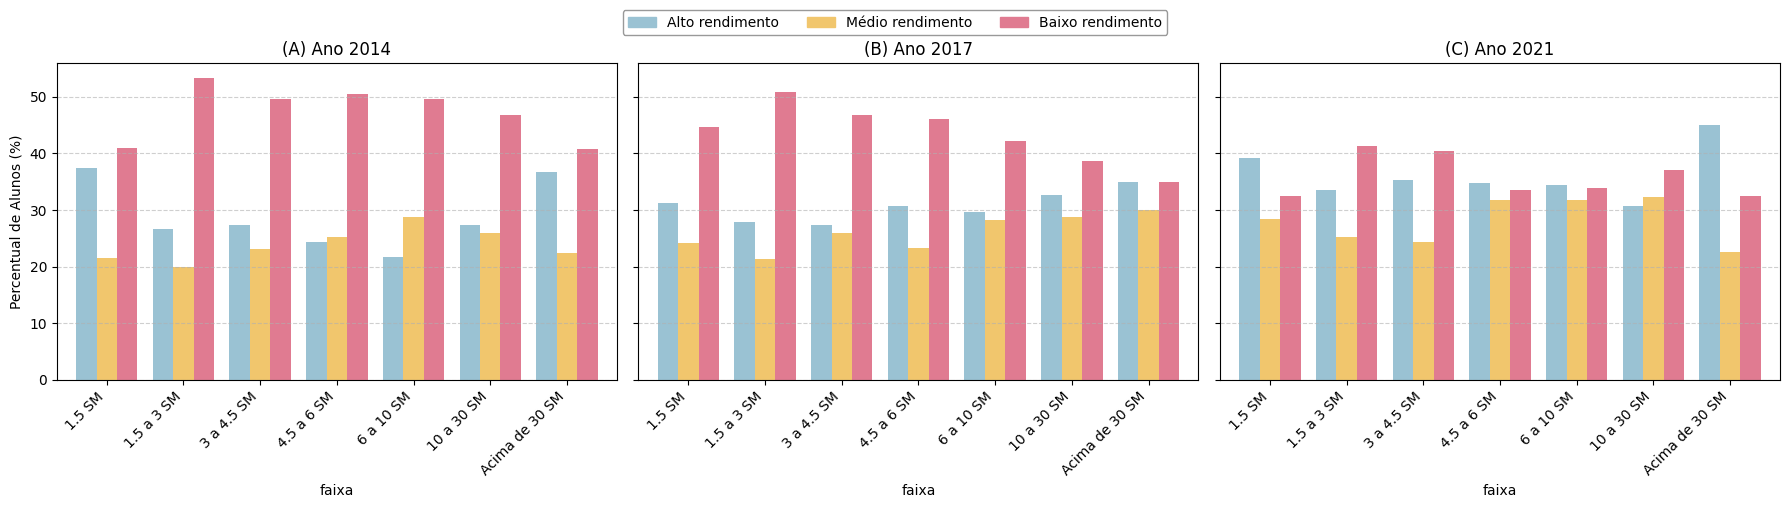

In [233]:
cores = {
    'Alto rendimento': '#9ac2d3',
    'Médio rendimento': '#f1c66d',
    'Baixo rendimento': '#e07b91'
}

ordem_clusters = ['Alto rendimento', 'Médio rendimento', 'Baixo rendimento']

colunas_renda = [
    'renda_familiar_1.5 SM', 'renda_familiar_1.5 a 3 SM',
    'renda_familiar_3 a 4.5 SM', 'renda_familiar_4.5 a 6 SM',
    'renda_familiar_6 a 10 SM', 'renda_familiar_10 a 30 SM',
    'renda_familiar_Acima de 30 SM'
]

anos_desejados = sorted(dados['ano'].unique())

fig, axes = plt.subplots(1, len(anos_desejados), figsize=(18, 5), sharey=True)

for i, ano in enumerate(anos_desejados):
    ax = axes[i]
    dados_ano = dados[dados['ano'] == ano]

    registros = []
    for faixa in colunas_renda:
        alunos_faixa = dados_ano[dados_ano[faixa] == 1]
        dist = alunos_faixa['cluster_legenda'].value_counts(normalize=True) * 100
        linha = {cluster: dist.get(cluster, 0) for cluster in ordem_clusters}
        linha['faixa'] = faixa.replace('renda_familiar_', '')
        registros.append(linha)

    df_plot = pd.DataFrame(registros).set_index('faixa')
    df_plot = df_plot[ordem_clusters]

    df_plot.plot(kind='bar', ax=ax, color=[cores[c] for c in ordem_clusters], width=0.8)

    ax.set_title(f"({chr(65+i)}) Ano {ano}")
    ax.set_xticklabels(df_plot.index, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    if i == 0:
        ax.set_ylabel('Percentual de Alunos (%)')
    else:
        ax.set_ylabel('')
    ax.legend().set_visible(False)

legenda = fig.legend(
    handles=[plt.Rectangle((0,0),1,1, color=cores[c]) for c in ordem_clusters],
    labels=ordem_clusters,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02),
    ncol=3,
    frameon=True,
    fancybox=True,
    edgecolor='gray'
)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()